In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import healpy as hp

In [2]:
NSIDE = 512
print(
    "Approximate resolution at NSIDE {} is {:.2} deg".format(
        NSIDE, hp.nside2resol(NSIDE, arcmin=True) / 60
    )
)

Approximate resolution at NSIDE 512 is 0.11 deg


In [3]:
NPIX = hp.nside2npix(NSIDE)
print(NPIX)

3145728


In [4]:
ori = np.loadtxt("./earth_1Mhz/B_original.txt")

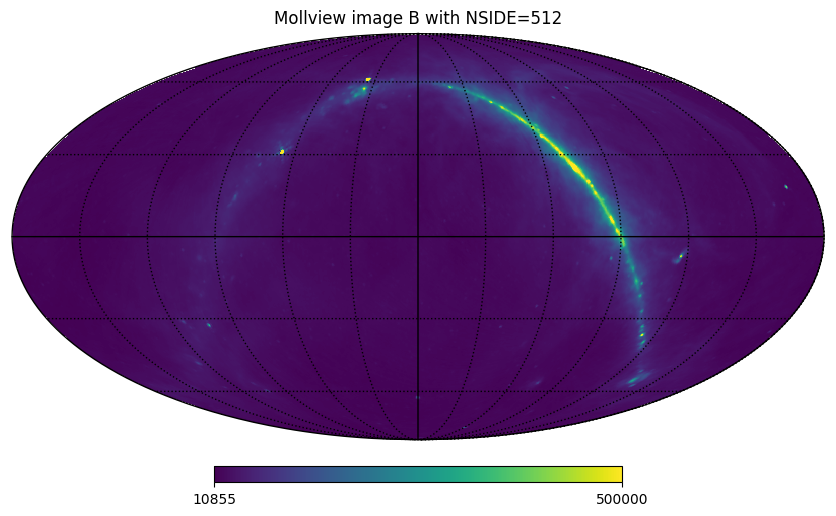

In [5]:
hp.mollview(ori, nest=True, title="Mollview image B with NSIDE=512")
hp.graticule()  # 添加经纬线
plt.show()

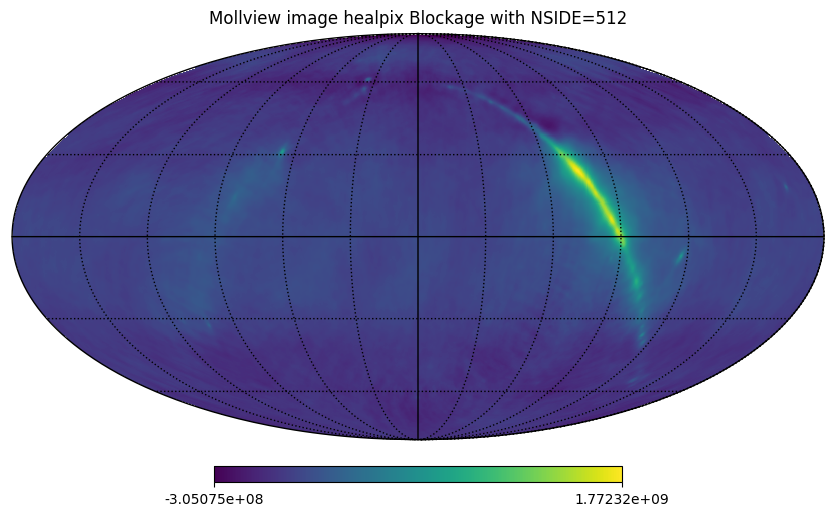

In [6]:
total_data = np.loadtxt("./3dblockage/C1day1M.txt")

# 读取并累加450个文件
for i in range(2, 451):
    file_path = f"./3dblockage/C{i}day1M.txt"
    data = np.loadtxt(file_path)
    
    # 将nan值转换为0
    data = np.nan_to_num(data)
    
    # 累加数据
    total_data += data
    
hp.mollview(total_data, nest=True, title="Mollview image healpix Blockage with NSIDE=512")
hp.graticule()  # 添加经纬线
plt.show()